### Salaires:

In [88]:
import pandas as pd
import numpy as np
import re
from unicodedata import normalize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df_graph = pd.read_csv('indeed.pre_processing.csv')
def salary_man(df):
    salaire_moyen = []
    ecart_salaire = []
    salaire_min = []
    salaire_max = []
    for i in range(len(df)):
        try:
            salaire_liste = re.findall('(\d+),?',normalize('NFKD',df['salaire'][i]).replace(' ',''))
            mois = re.search('mois',df['salaire'][i])
            jour = re.search('jour',df['salaire'][i])
            heure = re.search('heure',df['salaire'][i])
            if mois:
                if len(salaire_liste) > 1:
                    moy = 12 * (int(salaire_liste[0]) + int(salaire_liste[1])) / 2
                    salaire_moyen.append(moy)
                    ecart_salaire.append(12 * abs(int(salaire_liste[0]) - int(salaire_liste[1])) / moy)
                    salaire_min.append(12 * min(int(salaire_liste[0]),int(salaire_liste[1])))
                    salaire_max.append(12 * max(int(salaire_liste[0]),int(salaire_liste[1])))
                else:
                    salaire_moyen.append(int(salaire_liste[0]) * 12)
                    salaire_min.append('None')
                    salaire_max.append('None')
            elif jour:
                # Le nombre de jours travaillés maximum retenu sur la période de référence est de 261 jours.
                if len(salaire_liste) > 1:
                    moy = 261 * (int(salaire_liste[0]) + int(salaire_liste[1])) / 2
                    salaire_moyen.append(moy)
                    ecart_salaire.append(261 * abs(int(salaire_liste[0]) - int(salaire_liste[1]))/ moy)
                    salaire_min.append(261 * min(int(salaire_liste[0]),int(salaire_liste[1])))
                    salaire_max.append(261 * max(int(salaire_liste[0]),int(salaire_liste[1])))
                else:
                    salaire_moyen.append(int(salaire_liste[0]) * 261)
                    salaire_min.append('None')
                    salaire_max.append('None')
            elif heure:
                # 1600 heures travaillées par an.
                if len(salaire_liste) > 1:
                    moy = (int(salaire_liste[0]) + int(salaire_liste[1])) / 2
                    if moy < 20:
                    #grande chance que le salaire soit exprimé en fait en k euros:
                        salaire_moyen.append(moy * 1600)
                        ecart_salaire.append(abs(int(salaire_liste[0]) - int(salaire_liste[1])) / moy)
                        salaire_min.append(1600 * min(int(salaire_liste[0]),int(salaire_liste[1])))
                        salaire_max.append(1600 * max(int(salaire_liste[0]),int(salaire_liste[1])))
                    else:
                        salaire_moyen.append(moy * 1000)
                        ecart_salaire.append(abs(int(salaire_liste[0]) - int(salaire_liste[1])) / moy)
                        salaire_min.append(1000 * min(int(salaire_liste[0]),int(salaire_liste[1])))
                        salaire_max.append(1000 * max(int(salaire_liste[0]),int(salaire_liste[1])))
                else:
                    if int(salaire_liste[0]) < 20:
                        salaire_moyen.append(int(salaire_liste[0]) * 1600)
                        salaire_min.append('None')
                        salaire_max.append('None')
                    else:
                        salaire_moyen.append(int(salaire_liste[0]) * 1000)
                        salaire_min.append('None')
                        salaire_max.append('None')
            else:
                if len(salaire_liste) > 1:
                    moy = (int(salaire_liste[0]) + int(salaire_liste[1])) / 2
                    salaire_moyen.append(moy)
                    ecart_salaire.append(abs(int(salaire_liste[0]) - int(salaire_liste[1])) / moy)
                    salaire_min.append(min(int(salaire_liste[0]),int(salaire_liste[1])))
                    salaire_max.append(max(int(salaire_liste[0]),int(salaire_liste[1])))
                else:
                    salaire_moyen.append(int(salaire_liste[0]))
                    salaire_min.append('None')
                    salaire_max.append('None')
                    
        except:
            salaire_moyen.append('None')
            salaire_min.append('None')
            salaire_max.append('None')
            continue
    return salaire_moyen, ecart_salaire, salaire_min, salaire_max

salaire_moyen, ecart_salaire, salaire_min, salaire_max = salary_man(df_graph)

#df.insert(6, "salaire_moyen", salaire_moyen, True)
df_graph['salaire_moyen'] = salaire_moyen

In [90]:
import statistics
import random
mean = statistics.mean(ecart_salaire)
std = statistics.stdev(ecart_salaire)
for i in range(len(salaire_min)):
    if salaire_moyen[i] != 'None' and salaire_max[i] == 'None':
        salaire_min[i] = salaire_moyen[i] - (mean + random.uniform(-1,1) * std) * salaire_moyen[i]
        salaire_max[i] = salaire_moyen[i] + (mean + random.uniform(-1,1) * std) * salaire_moyen[i]

df_graph['salaire_min'] = salaire_min
df_graph['salaire_max'] = salaire_max

In [91]:
df_graph['salaire_min'][df_graph['salaire_min'] != 'None']

4         30000
8        4594.7
19        30000
20        38000
23        37000
24        34000
25        40000
26        34000
32        30000
41        45000
44        40000
48        40000
62      37041.5
63        50553
64        11745
66      1179.97
71        50000
72        70000
73        45000
75      39084.9
77      59321.4
78      832.298
79        40000
80        40000
90        40000
91        50000
97        38000
112     27428.2
116       35000
117     26243.7
         ...   
8017      33000
8026      35000
8027      35000
8028      45000
8034    10998.7
8043      78300
8053    40345.7
8056      38000
8058      78300
8063      27600
8064    32248.2
8067    30186.4
8068      24000
8069      45000
8070      33000
8071      35000
8074      50000
8075      36000
8079       7200
8084    44551.8
8086      35000
8095      26390
8099    27103.8
8102    4082.63
8105      55000
8109      60000
8119      40000
8120      40000
8124      50000
8127      45000
Name: salaire_min, Lengt

In [92]:
centre = [1 if (df_graph['localisation'][i] in df_graph['adresse'][i]) else 0 for i in range(len(df_graph))]
df_graph['centre'] = centre
df_graph['centre'].head()

0    1
1    1
2    0
3    1
4    1
Name: centre, dtype: int64

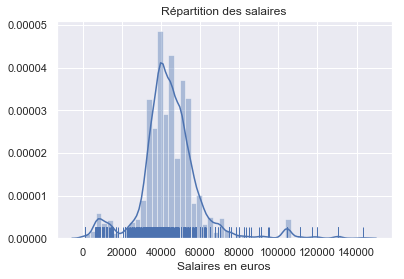

In [110]:
df_sal = df_graph[df_graph['salaire_moyen'] != 'None']
g = sns.distplot(a = list(df_sal['salaire_moyen'].values), rug = True, axlabel='Salaires en euros')
plt.title("Répartition des salaires")
plt.show()

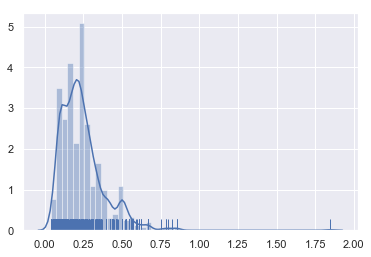

In [96]:
sns.distplot(a = ecart_salaire, rug = True)

In [106]:
kmeans = KMeans(n_clusters=4,init = 'k-means++', max_iter=1000).fit(df_sal['salaire_moyen'].values.reshape(-1, 1))
sal_classe = kmeans.labels_

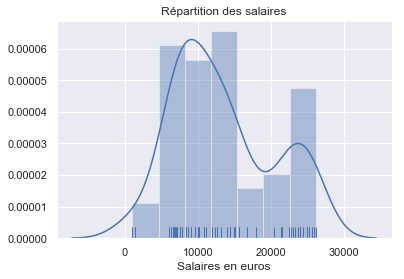

In [113]:
g = sns.distplot(a = list(df_sal['salaire_moyen'].values[sal_classe == 3]), rug = True, axlabel='Salaires en euros')
plt.title("Répartition des salaires")
plt.show()

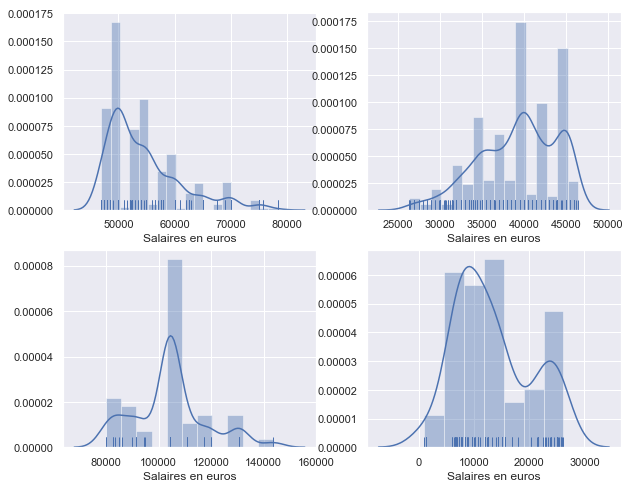

In [116]:
f, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.distplot(a = list(df_sal['salaire_moyen'].values[sal_classe == 0]),
             rug = True, axlabel='Salaires en euros',ax=axes[0,0])
sns.distplot(a = list(df_sal['salaire_moyen'].values[sal_classe == 1]),
             rug = True, axlabel='Salaires en euros',ax=axes[0,1])
sns.distplot(a = list(df_sal['salaire_moyen'].values[sal_classe == 2]),
             rug = True, axlabel='Salaires en euros',ax=axes[1,0])
sns.distplot(a = list(df_sal['salaire_moyen'].values[sal_classe == 3]),
             rug = True, axlabel='Salaires en euros',ax=axes[1,1])


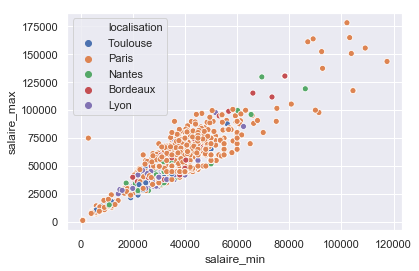

In [95]:
sns.set()
sns.scatterplot(x="salaire_min", y="salaire_max", hue="localisation", data=df_sal)

In [99]:
df_sal["localisation"]

4       Toulouse
8          Paris
19         Paris
20         Paris
23         Paris
24        Nantes
25        Nantes
26        Nantes
32        Nantes
41        Nantes
44        Nantes
48      Bordeaux
62         Paris
63         Paris
64         Paris
66         Paris
71         Paris
72         Paris
73         Paris
75         Paris
77         Paris
78         Paris
79         Paris
80         Paris
90         Paris
91         Paris
97        Nantes
112       Nantes
116       Nantes
117       Nantes
          ...   
8017        Lyon
8026       Paris
8027    Toulouse
8028       Paris
8034      Nantes
8043       Paris
8053    Bordeaux
8056       Paris
8058    Bordeaux
8063       Paris
8064       Paris
8067       Paris
8068       Paris
8069       Paris
8070       Paris
8071       Paris
8074       Paris
8075       Paris
8079       Paris
8084       Paris
8086       Paris
8095       Paris
8099       Paris
8102       Paris
8105       Paris
8109       Paris
8119       Paris
8120       Par

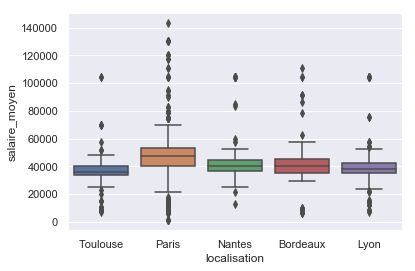

In [100]:
sns.boxplot(x="localisation", y=df_sal['salaire_moyen'].astype(np.float), data=df_sal)

C:\Users\utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


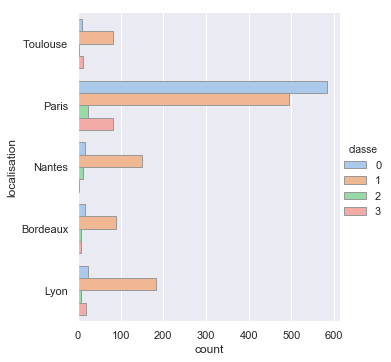

In [118]:
df_sal['classe'] = sal_classe
sns.catplot(y="localisation", hue="classe", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_sal)

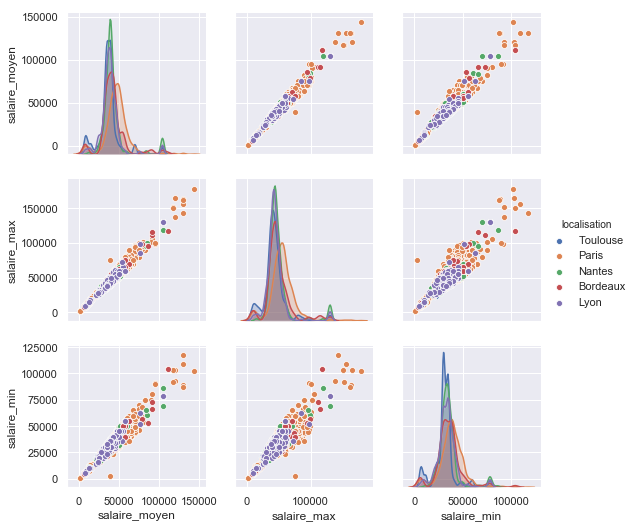

In [105]:
#sert à rien
data = df_sal[["localisation","salaire_moyen","salaire_max","salaire_min"]]
sns.pairplot(data=data, hue="localisation")